In [6]:
#Inversion of trough migration path 1 using:
#a)linear insolation accumulation and b)linear lag submodels
#input tmp 1 data points
#output distribution of linear insolation model parameters

In [31]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os, sys
script_path = os.path.realpath(os.path.dirname(__name__))
os.chdir(script_path)
sys.path.append("../scripts/")
#inv is the inversion script 
import tmp_inversion as inv
import figures_mcmc as figs

In [7]:
accModel_ins_dict= { 1: "Linear_Insolation",
                     2: "Quadratic_Insolation",
                     3: "Cubic_Insolation",
                     4: "PowerLaw_Insolation" }
    
accModel_obl_dict= { 1: "Linear_Obliquity",
                     2: "Quadratic_Obliquity",
                     3: "Cubic_Obliquity",
                     4: "PowerLaw_Obliquity" }
    
lagModel_dict= {  1: "ConstantLag",
                  2: "LinearLag",
                  3: "QuadraticLag",
                  4: "CubicLag",
                  5: "PowerLawLag" }

In [9]:
#input parameters
acc=1 #linear submodel
lag=2 #linear submodel
steps=100 #100 mcmc steps is not enough for convergence
thin_by=1 #save ensemble every thin_by models
data="insolation" #insolation or obliquity dependence of accumulation
tmp=1
directory= "../../outputTest/" #dir to save output ensemble

if data=="insolation":
    accModelName=accModel_ins_dict[acc]
    lagModelName=lagModel_dict[lag]


In [11]:
#run inv script
inv.mainArgs(acc,lag,steps,thin_by,data,tmp,directory)

All initial parameters fit priors
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %
Running time 13.6 seconds for Linear_Insolation_LinearLag 100


../../outputTest/insolation/TMP1/obj/Linear_Insolation_LinearLag_100obj


In [ ]:
#output of inv script is the python object containing the output ensemble of all parameters 
#of the accumulation and lag submodels


In [21]:
#open python object mcmcobj
objPath=(directory+data+'/TMP'+str(tmp)+'/obj/'+
          accModelName+'_'+lagModelName+'_'+str(steps)+'obj')
infile=open(objPath,'rb')
mcmcobj=pickle.load(infile) #obj containing ensembles
infile.close()

Text(0.5, 1.0, 'Likelihood of chains at all steps')

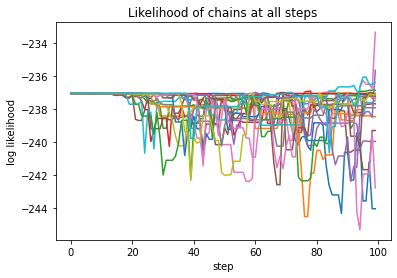

In [30]:
#Plot likelihood of all steps 
xaxis=np.arange(0,mcmcobj.totalSteps,mcmcobj.thin_by)
plt.plot(xaxis,mcmcobj.logprob)
plt.xlabel('step')
plt.ylabel('log likelihood')
plt.title('Likelihood of chains at all steps')

In [32]:
#Plot figures to check on mcmc performance and output
plotdir=(directory+data+'/TMP'+str(tmp)+'/') #where to save figures
nmodels=10 #number of models or steps to include in figures
stepEnsemble=1 #plot every stepsEnsemble models

figs.mainArgs(objPath,plotdir,nmodels,stepEnsemble)


Input file path
../../outputTest/insolation/TMP1/obj/Linear_Insolation_LinearLag_100obj


0
